### ***Iris Flower Prediction***

Hi Everyone! Welcome to my notebook.

Greetings! 👋 I'm Mehul Jain, and I'm absolutely thrilled to welcome you into my world of data science exploration and innovation. 📊 With a burning passion for data and a knack for machine learning, I’m on a mission to uncover the secrets hidden within datasets.

I’m super eager to dive into an internship opportunity at Oasis Infobyte! 🌟 It’s the perfect chance for me to put my skills to the test and learn from the best in the industry. Let’s make magic happen together! ✨

# ***My Task***

In this notebook, my purpose is to analyze data and train models for the task assigned by OSISInfoBytes. 📊🤖

***Importing Toolkits💼🔨***

In [10]:
# Importing necessary libraries for Iris Flower Classification

# Data manipulation and analysis
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Data visualization
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For basic plotting

# Machine Learning
from sklearn.datasets import load_iris  # For loading the Iris dataset
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.ensemble import RandomForestClassifier  # For classification model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")


In [9]:
# Import necessary libraries
import pandas as pd

# Upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

# Assuming the file name is 'iris.csv' (or the name you used to upload)
file_name = list(uploaded.keys())[0]

# Load the dataset
iris_df = pd.read_csv(file_name)

# Display the first few rows of the dataframe
print(iris_df.head())

# Check the shape and data types
print(f"Shape of the dataset: {iris_df.shape}")
print(f"Data types:\n{iris_df.dtypes}")


Saving Iris.csv to Iris (2).csv
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Shape of the dataset: (150, 6)
Data types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [12]:
# Drop id column
iris_df.drop('Id',axis=1,inplace=True) # Changed 'df' to 'iris_df'

In [15]:
iris_df.head() # Changed 'df' to 'iris_df'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


***Check Correlation***

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


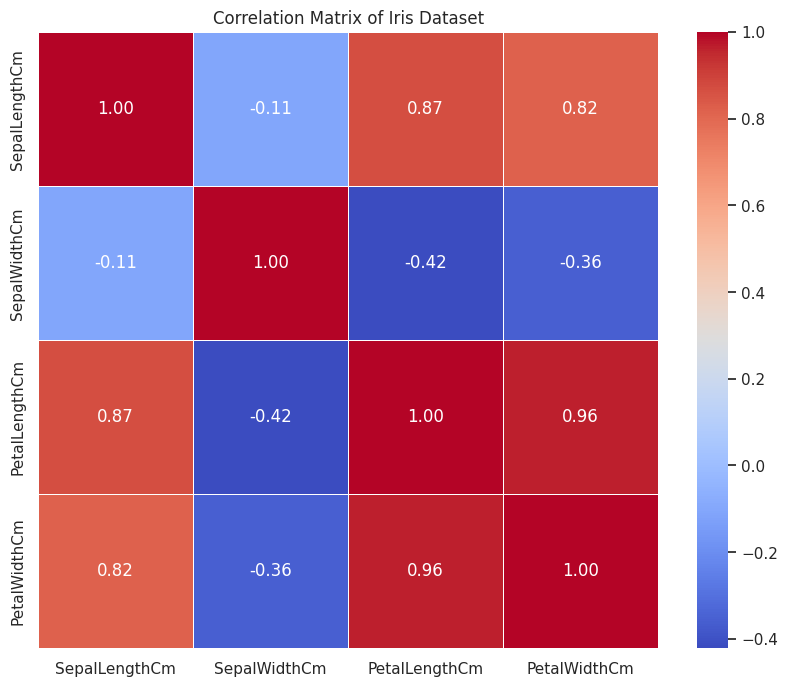

In [17]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Added import for pandas

# Compute the correlation matrix for numeric columns only
correlation_matrix = iris_df.select_dtypes(include=['number']).corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

***Basic Information About Dataset***

In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
# Overview of dataset
print("Number of Rows :" , iris_df.shape[0])
print("Number of Columns :" , iris_df.shape[1])

Number of Rows : 150
Number of Columns : 5


In [22]:
#Describe the data

iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [23]:
iris_df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [24]:
# Check unique values
iris_df.nunique()

,0
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


***Check missing values***

In [25]:
#Check Null values
missing = iris_df.isnull().sum().sort_values(ascending = False)
missing

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [27]:
#Check Null values
missing = iris_df.isnull().sum().sort_values(ascending = True)
missing

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


***Deal with duplicates values***

In [29]:
iris_df.duplicated().sum()

3

In [30]:
# Drop duplicate values
iris_df.drop_duplicates(inplace=True)

***Deal with outliers***

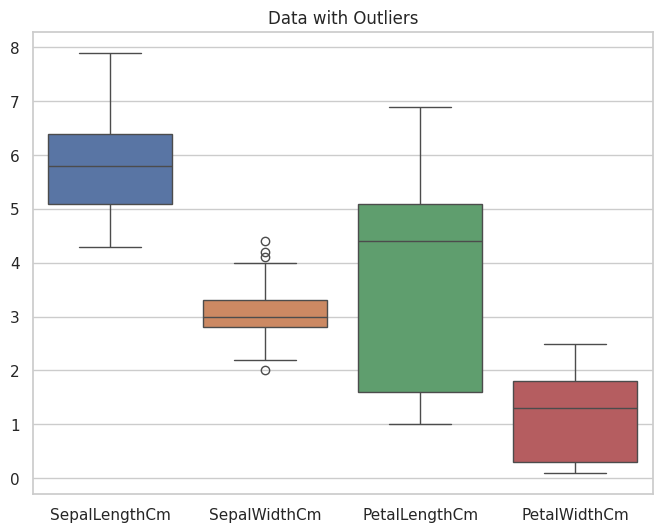

In [32]:
# Visualize the data before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df)
plt.title("Data with Outliers")
plt.show()

***Visulization***

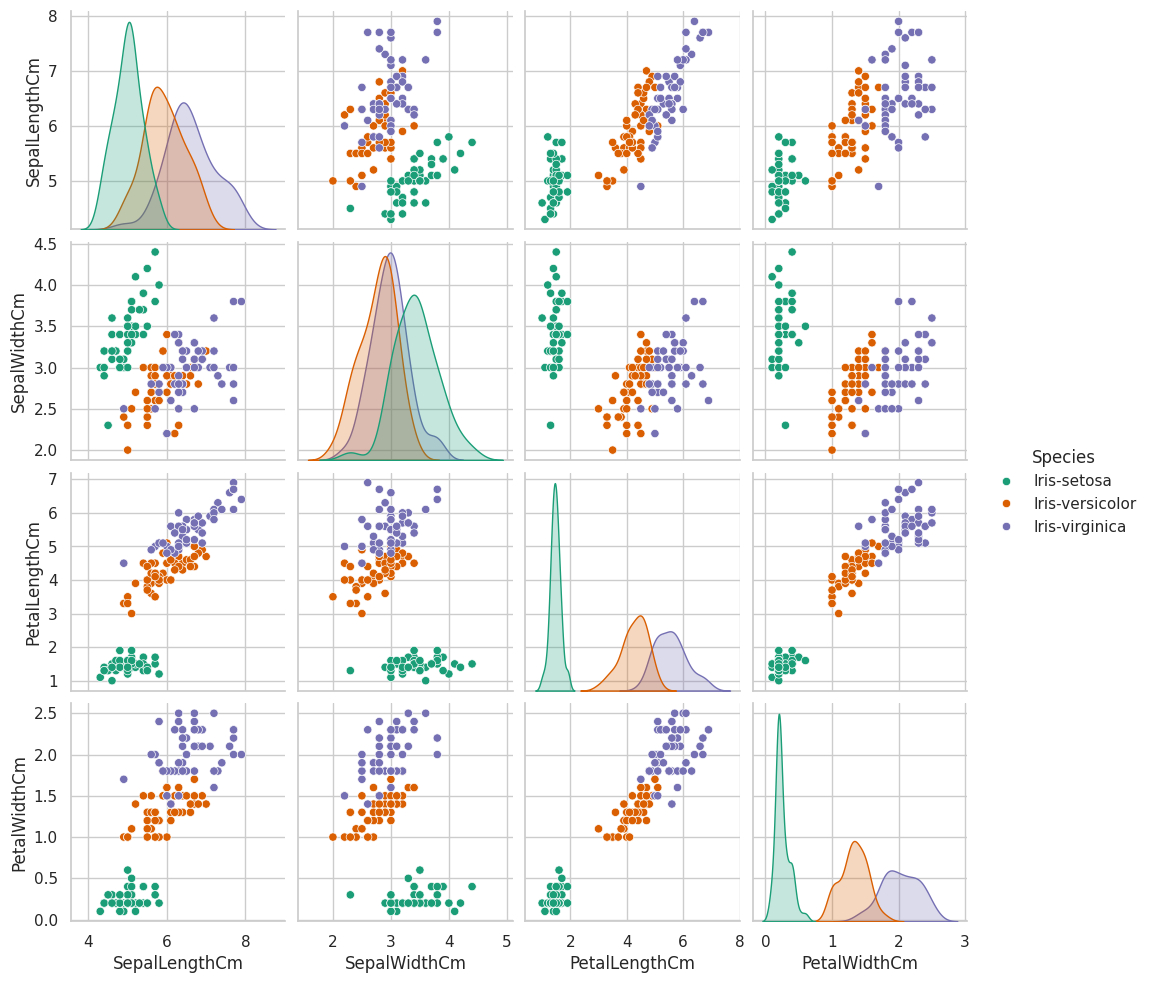

In [34]:
# Make Pair plot
sns.pairplot(iris_df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

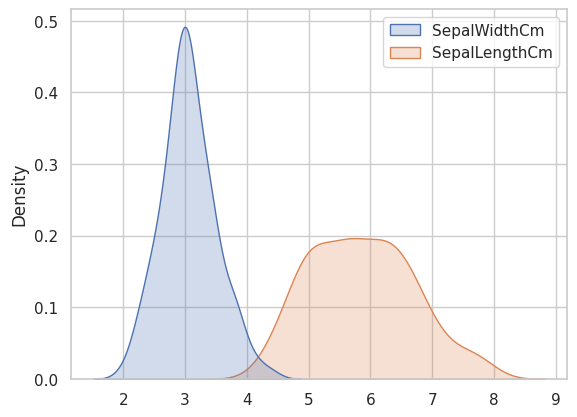

In [36]:
sns.kdeplot(iris_df[['SepalWidthCm', 'SepalLengthCm']] , fill=True)
plt.show()

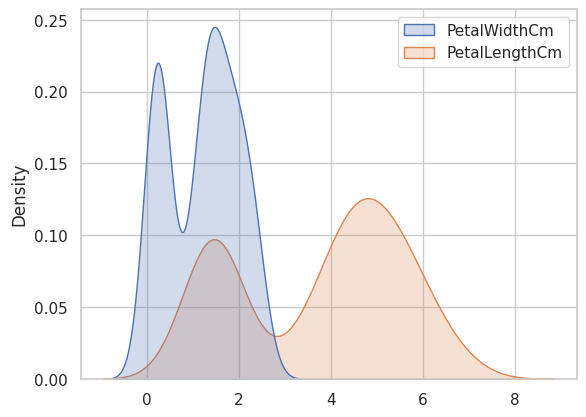

In [38]:
sns.kdeplot(iris_df[['PetalWidthCm', 'PetalLengthCm']], fill=True)
plt.show()

***Model Building***

In [40]:
X = iris_df.drop(['Species'], axis=1)
y = iris_df['Species']


In [41]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Create model
lg = LogisticRegression()

#Fit the model
clf = lg.fit(X_train, y_train)

In [43]:
# Predict the model
y_pred = clf.predict(X_test)

In [44]:
#Evaluate the model
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.9333333333333333


In [45]:
#Print classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# ***Save Model***

In [46]:
#Save model
import pickle

with open('iris_model.pkl', 'wb') as file:
    pickle.dump(clf, file)